In [12]:
from coffea.util import load
import hist
import numpy as np
import matplotlib.pyplot as plt

In [13]:
output = load("output.coffea")

In [14]:
sum_gw = {}
def get_sum_gw(smpl):
    if smpl not in sum_gw:
        N = 0
        for dataset in output['sum_genweights']:
            if smpl+"_" in dataset:
                N += output['sum_genweights'][dataset]
        sum_gw[smpl] = N
    return sum_gw[smpl]
ef = {"pt": {}, "eta": {}}
for cat in output["custom_info"]['nevents']:
    ef["pt"][cat] = {}
    for pt in output["custom_info"]['nevents'][cat]:
        ef["pt"][cat][pt] = {}
        ef["pt"][cat][pt]["total_mc"] = 0
        ef["pt"][cat][pt]["total_data"] = 0
        for smpl in output["custom_info"]['nevents'][cat][pt]:
            if not "DATA_" in smpl and not "Signal_" in smpl:
                ef["pt"][cat][pt][smpl] = output["custom_info"]['nevents'][cat][pt][smpl]/get_sum_gw(smpl)
                ef["pt"][cat][pt]["total_mc"] += ef["pt"][cat][pt][smpl]
            elif "DATA_" in smpl:
                ef["pt"][cat][pt][smpl] = output["custom_info"]['nevents'][cat][pt][smpl]
                ef["pt"][cat][pt]["total_data"] += ef["pt"][cat][pt][smpl]
for cat in output["custom_info"]['nevents_eta']:
    ef["eta"][cat] = {}
    for eta in output["custom_info"]['nevents_eta'][cat]:
        ef["eta"][cat][eta] = {}
        ef["eta"][cat][eta]["total_mc"] = 0
        ef["eta"][cat][eta]["total_data"] = 0
        for smpl in output["custom_info"]['nevents_eta'][cat][eta]:
            if not "DATA_" in smpl and not "Signal_" in smpl:
                ef["eta"][cat][eta][smpl] = output["custom_info"]['nevents_eta'][cat][eta][smpl]/get_sum_gw(smpl)
                ef["eta"][cat][eta]["total_mc"] += ef["eta"][cat][eta][smpl]
            elif "DATA_" in smpl:
                ef["eta"][cat][eta][smpl] = output["custom_info"]['nevents_eta'][cat][eta][smpl]
                ef["eta"][cat][eta]["total_data"] += ef["eta"][cat][eta][smpl]

In [15]:
EF = {"total_data": {"b1": {}, "b0": {}}, "total_mc": {"b1": {}, "b0": {}}}
EF_err = {"total_data": {"b1": {}, "b0": {}}, "total_mc": {"b1": {}, "b0": {}}}
EF_eta = {"total_data": {"b1": {}, "b0": {}}, "total_mc": {"b1": {}, "b0": {}}}
EF_eta_err = {"total_data": {"b1": {}, "b0": {}}, "total_mc": {"b1": {}, "b0": {}}}
for pt_interval in ef["pt"]["PLJ"]:
    for smpl in ["total_data", "total_mc"]:
        n_crb = ef["pt"]["CRB"][pt_interval][smpl]
        n_crc = ef["pt"]["CRC"][pt_interval][smpl]
        n_crd = ef["pt"]["CRD"][pt_interval][smpl]
        n_plj = ef["pt"]["PLJ"][pt_interval][smpl]
        EF[smpl]["b1"][pt_interval] = ((n_crb*n_crc)/n_crd)/n_plj    
        EF_err[smpl]["b1"][pt_interval] = EF[smpl]["b1"][pt_interval] * np.sqrt(1/n_crb + 1/n_crc + 1/n_crd + 1/n_plj)
for pt_interval in ef["pt"]["PLJ"]:
    for smpl in ["total_data", "total_mc"]:
        n_crb = ef["pt"]["b0_CRB"][pt_interval][smpl]
        n_crc = ef["pt"]["b0_CRC"][pt_interval][smpl]
        n_crd = ef["pt"]["b0_CRD"][pt_interval][smpl]
        n_plj = ef["pt"]["b0_PLJ"][pt_interval][smpl]
        EF[smpl]["b0"][pt_interval] = ((n_crb*n_crc)/n_crd)/n_plj    
        EF_err[smpl]["b0"][pt_interval] = EF[smpl]["b0"][pt_interval] * np.sqrt(1/n_crb + 1/n_crc + 1/n_crd + 1/n_plj)
    
for eta_interval in ef["eta"]["PLJ"]:
    for smpl in ["total_data", "total_mc"]:
        n_crb = ef["eta"]["CRB"][eta_interval][smpl]
        n_crc = ef["eta"]["CRC"][eta_interval][smpl]
        n_crd = ef["eta"]["CRD"][eta_interval][smpl]
        n_plj = ef["eta"]["PLJ"][eta_interval][smpl]
        EF_eta[smpl]["b1"][eta_interval] = ((n_crb*n_crc)/n_crd)/n_plj    
        EF_eta_err[smpl]["b1"][eta_interval] = EF_eta[smpl]["b1"][eta_interval] * np.sqrt(1/n_crb + 1/n_crc + 1/n_crd + 1/n_plj)
for eta_interval in ef["eta"]["PLJ"]:
    for smpl in ["total_data", "total_mc"]:
        n_crb = ef["eta"]["b0_CRB"][eta_interval][smpl]
        n_crc = ef["eta"]["b0_CRC"][eta_interval][smpl]
        n_crd = ef["eta"]["b0_CRD"][eta_interval][smpl]
        n_plj = ef["eta"]["b0_PLJ"][eta_interval][smpl]
        EF_eta[smpl]["b0"][eta_interval] = ((n_crb*n_crc)/n_crd)/n_plj    
        EF_eta_err[smpl]["b0"][eta_interval] = EF_eta[smpl]["b0"][eta_interval] * np.sqrt(1/n_crb + 1/n_crc + 1/n_crd + 1/n_plj)

In [16]:
EF

{'total_data': {'b1': {'[60, 80]': 0.0797984974562149,
   '[80, 100]': 0.07061471098431123,
   '[100, np.inf]': 0.06158923207408517},
  'b0': {'[60, 80]': 0.10411184521780673,
   '[80, 100]': 0.08726479750778816,
   '[100, np.inf]': 0.06899617457280931}},
 'total_mc': {'b1': {'[60, 80]': 0.06529836495060172,
   '[80, 100]': 0.04990707854226917,
   '[100, np.inf]': 0.03560997065342916},
  'b0': {'[60, 80]': 0.10825439547334356,
   '[80, 100]': 0.07361654447767046,
   '[100, np.inf]': 0.07721272187910781}}}

In [7]:
EF

{'total_data': {'b1': {'[60, 80]': 0.0797984974562149,
   '[80, 100]': 0.07061471098431123,
   '[100, np.inf]': 0.06158923207408517},
  'b0': {'[60, 80]': 0.10411184521780673,
   '[80, 100]': 0.08726479750778816,
   '[100, np.inf]': 0.06899617457280931}},
 'total_mc': {'b1': {'[60, 80]': 0.06526862872371358,
   '[80, 100]': 0.04989275264985434,
   '[100, np.inf]': 0.03561686453021977},
  'b0': {'[60, 80]': 0.10824581984445399,
   '[80, 100]': 0.07361224472820414,
   '[100, np.inf]': 0.0772081518062584}}}

In [10]:
EF_err

{'total_data': {'b1': {'[60, 80]': 0.004952438144717445,
   '[80, 100]': 0.006157660842632962,
   '[100, np.inf]': 0.004665345102881518},
  'b0': {'[60, 80]': 0.0019529911716189687,
   '[80, 100]': 0.0025325761386428107,
   '[100, np.inf]': 0.0018827335383229833}},
 'total_mc': {'b1': {'[60, 80]': 0.0064234149503070255,
   '[80, 100]': 0.007468019153585453,
   '[100, np.inf]': 0.004778165459506996},
  'b0': {'[60, 80]': 0.0030126166235964107,
   '[80, 100]': 0.003319504547460807,
   '[100, np.inf]': 0.002992323699091679}}}

In [9]:
for cat in ef["pt"]:
    for pt in ef["pt"][cat]:
        print(cat, pt, ef["pt"][cat][pt]["total_data"])
        print(cat, pt, ef["pt"][cat][pt]["total_mc"])

PLJ [60, 80] 2294
PLJ [60, 80] 1229.2871595132208
PLJ [80, 100] 1111
PLJ [80, 100] 620.4230602657641
PLJ [100, np.inf] 1589
PLJ [100, np.inf] 811.575392366884
CRB [60, 80] 385
CRB [60, 80] 136.210430693902
CRB [80, 100] 197
CRB [80, 100] 55.80483355191883
CRB [100, np.inf] 249
CRB [100, np.inf] 67.65618209381024
CRC [60, 80] 1803
CRC [60, 80] 1038.2787242552427
CRC [80, 100] 859
CRC [80, 100] 541.1140255597293
CRC [100, np.inf] 1275
CRC [100, np.inf] 719.1367710698067
CRD [60, 80] 3792
CRD [60, 80] 1762.6516317545072
CRD [80, 100] 2157
CRD [80, 100] 975.5178291617372
CRD [100, np.inf] 3244
CRD [100, np.inf] 1683.1949806980797
b0_PLJ [60, 80] 22091
b0_PLJ [60, 80] 11766.883282999781
b0_PLJ [80, 100] 9309
b0_PLJ [80, 100] 4871.615422544113
b0_PLJ [100, np.inf] 11386
b0_PLJ [100, np.inf] 7078.215542670589
b0_CRB [60, 80] 4656
b0_CRB [60, 80] 1953.4724589640691
b0_CRB [80, 100] 1885
b0_CRB [80, 100] 691.4003168979561
b0_CRB [100, np.inf] 2002
b0_CRB [100, np.inf] 919.1096350664061
b0_CRC [

In [11]:
EF_eta

{'total_data': {'b1': {'[-1.5, -1]': 0.09224923667154743,
   '[-1, -0.5]': 0.06398205398384328,
   '[-0.5, 0]': 0.06538691307314072,
   '[0, 0.5]': 0.055831826401446655,
   '[0.5, 1]': 0.07087192341962395,
   '[1, 1.5]': 0.10013459430068902},
  'b0': {'[-1.5, -1]': 0.10629777526673242,
   '[-1, -0.5]': 0.08317728897030943,
   '[-0.5, 0]': 0.08057343483879141,
   '[0, 0.5]': 0.08099507063507402,
   '[0.5, 1]': 0.0878963748002355,
   '[1, 1.5]': 0.1135555670611887}},
 'total_mc': {'b1': {'[-1.5, -1]': 0.05384374214214861,
   '[-1, -0.5]': 0.061746000121961304,
   '[-0.5, 0]': 0.03919408924839857,
   '[0, 0.5]': 0.04023124058592737,
   '[0.5, 1]': 0.04709259306385176,
   '[1, 1.5]': 0.0724904063466874},
  'b0': {'[-1.5, -1]': 0.1173956372258269,
   '[-1, -0.5]': 0.06774357318094802,
   '[-0.5, 0]': 0.08528537092200968,
   '[0, 0.5]': 0.0867543072841756,
   '[0.5, 1]': 0.10419861525424652,
   '[1, 1.5]': 0.09537677643593072}}}

In [45]:
EF_eta_err

{'total_data': {'[-1.5, -1]': 0.010432436963694005,
  '[-1, -0.5]': 0.0066307521469053535,
  '[-0.5, 0]': 0.0064346987301860175,
  '[0, 0.5]': 0.005734615617044902,
  '[0.5, 1]': 0.006863365771522178,
  '[1, 1.5]': 0.010913005624198257},
 'total_mc': {}}

In [ ]:
output["nevents_eta"]

EF [0.07994607724014978, 0.07072255847972836, 0.061750999575642666]
EF_err [0.004961911329352825, 0.006170144015683251, 0.004678360850948373]


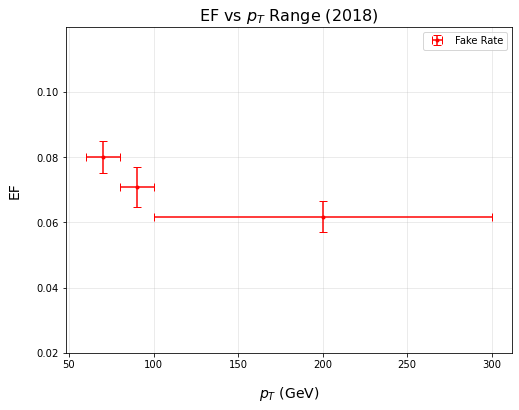

In [50]:
total_EF = []
total_EF_err = []

for pt in EF["total_data"].keys():
    total_EF.append(EF["total_data"][pt])
for pt in EF_err["total_data"].keys():
    total_EF_err.append(EF_err["total_data"][pt])

print ("EF", total_EF)
print("EF_err", total_EF_err)
pt = [70,90,200]
pt_err = [10,10,100]


# Draw Plot
fig, ax = plt.subplots(figsize=(8, 6))  #
ax.errorbar(pt, total_EF, yerr=total_EF_err, xerr=pt_err, 
                fmt='.', color='red', label='Fake Rate', capsize=4)

ax.set_xlabel("$p_T$ (GeV)", fontsize=14, labelpad=15)  
ax.set_ylabel("EF", fontsize=14, labelpad=15)
ax.set_title("EF vs $p_T$ Range (2018)", fontsize=16)
plt.ylim(0.02, max(total_EF)*1.5)
ax.grid(alpha=0.3)
ax.legend()


#fig.tight_layout()
fig.savefig("FAKERATE_pt.png", bbox_inches="tight", pad_inches=0.2, facecolor="white")  
#plt.show()

In [51]:
EF = []
EF_err = []

for eta in output["EF_eta"].keys():
    EF.append(output["EF_eta"][eta])
for eta in output["EF_eta_err"].keys():
    EF_err.append(output["EF_eta_err"][eta])

print ("EF", EF)
print("EF_err", EF_err)
eta = [-1.25,-0.75,-0.25,0.25,0.75,1.25]
eta_err = 0.25#,5,10,15,20,30,200]


# Draw Plot
fig, ax = plt.subplots(figsize=(8, 6))  #
ax.errorbar(eta, EF, yerr=EF_err, xerr=eta_err, 
                fmt='.', color='red', label='Fake Rate', capsize=4)

ax.set_xlabel("$\eta$ (GeV)", fontsize=14, labelpad=15)  
ax.set_ylabel("EF", fontsize=14, labelpad=15)
plt.ylim(0.05, max(EF)*1.5)
ax.set_title("EF vs $\eta$ Range (2018)", fontsize=16)
ax.grid(alpha=0.3)
ax.legend()


#fig.tight_layout()
fig.savefig("FAKERATE_eta.png", bbox_inches="tight", pad_inches=0.2, facecolor="white")  
#plt.show()

KeyError: 'EF_eta'